# データの準備

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston

In [3]:
# ボストンの住宅価格サンプルデータのロード
boston = load_boston()
print(boston.DESCR) #概要の表示

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# データの可視化

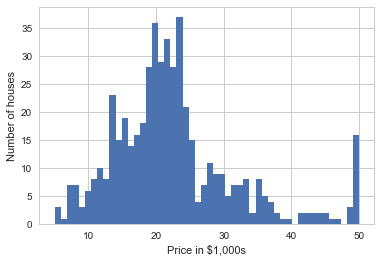

In [4]:
# ヒストグラムで表示
plt.hist(boston.target,bins=50)
plt.xlabel('Price in $1,000s')
plt.ylabel('Number of houses')

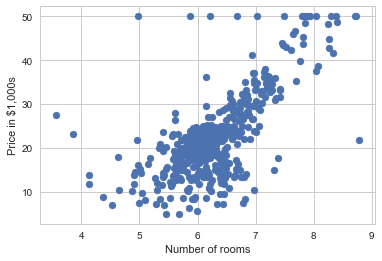

In [5]:
#散布図（部屋の数と価格の関係）
plt.scatter(boston.data[:,5],boston.target) #5番目が部屋数
plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')

##### 回帰直線をひく

In [6]:
#データフレームを作成する
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#目的変数（価格）を格納
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


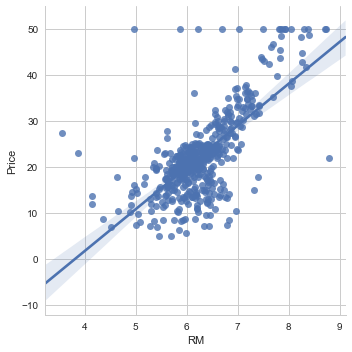

In [8]:
sns.lmplot('RM','Price',data = boston_df)

→複雑なモデルではこれでは力不足であるためscikit-learnを使っていく

# Numpyを使った単回帰
まずは単回帰（変数が１つ）をやる
（単回帰であれば、scikit-learnは使わずNumpyで十分）

In [9]:
X = boston_df.RM # 部屋数
print(X.shape)
X = np.vstack(boston_df.RM) #Numpyで扱うために二次元配列にする
print(X.shape)

(506,)
(506, 1)


In [10]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [11]:
Y = boston_df.Price #価格
print(Y.shape)

(506,)


In [12]:
# 行列の計算のためXを[X 1]の形にする
X = np.array( [ [value,1] for value in X ] )

In [13]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

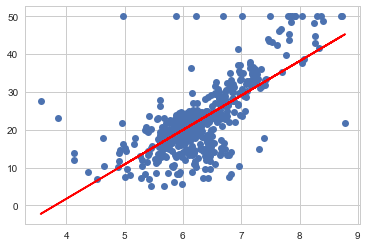

In [14]:
a, b = np.linalg.lstsq(X, Y)[0] #最小二乗法の計算を実行
plt.plot(boston_df.RM,boston_df.Price,'o') #データをプロット
x= boston_df.RM
plt.plot(x, a*x + b,'r')

# 重回帰分析(scikit-learnを使う)

In [15]:
#線形回帰をインポート
import sklearn
from sklearn.linear_model import LinearRegression

In [16]:
#線形回帰クラスのインスタンス作成
lreg = LinearRegression()

##### LinearRegression()の使い方
lreg.fit() はデータを元にモデルを作る<br>
lreg.predict() は作られたモデルを元に、予測値を返す<br>
lreg.score()は、決定係数を返す<br>
(決定係数は、説明変数でどれくらいうまく目的変数の値を説明出来ているかの指標)

In [17]:
# 説明変数(価格は目的変数なので削る)
X_multi = boston_df.drop('Price',1)
# 目的変数
Y_target = boston_df.Price

In [20]:
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
Y_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [22]:
# モデルを作成（説明変数,目的変数）
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#y=ax+bのb
print('切片の値は{:0.2f}'.format(lreg.intercept_))

切片の値は36.49


In [24]:
#y=ax+bのaxの数（特徴の数）
print('係数の数は{}個'.format(len(lreg.coef_)))

係数の数は13個


##### 求められた係数を確認

In [25]:
# 新しいDataFrameを作成
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
#求められた係数を代入
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


↑RM（部屋数）が価格に大きな影響を与えている

# 学習（Training）と検証（Validation）

一部のデータを使ってモデルを作り、残りのデータでモデルの検証を行う。<br>
train_test_splitを使うと、学習用と検証用に分けてくれる

In [28]:
# 説明変数をX、目的変数をYとして受け取る
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

In [29]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


# 価格の予測

In [30]:
lreg = LinearRegression()
# 先程とは違い、使うのは学習用のデータだけ
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# 予測
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [34]:
#X_trainを使ったモデルのためそっちのほうが誤差が少ないことがわかる
print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_train - pred_train) ** 2)))
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_test - pred_test) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝20.92
X_testを使ったモデルの平均二乗誤差＝25.92


# 残差プロット

残差=観測された値−予測された値<br>
残差プロット=横軸に予測値、縦軸に実際の値との差をプロット<br>
多くのデータがy=0の直線に近いところに集まれば、よいモデル

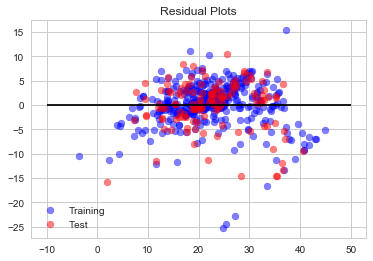

In [36]:
# 学習用のデータの残差プロット
train = plt.scatter(pred_train
                    ,(pred_train-Y_train)
                    ,c='b',alpha=0.5)
# テスト用のデータの残差プロット
test = plt.scatter(pred_test
                   ,(pred_test-Y_test)
                   ,c='r',alpha=0.5)
# y=0の水平な線
plt.hlines(y=0,xmin=-10,xmax=50)
# 凡例とタイトル
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')